In [1]:
import nltk
import pandas as pd
import os
import numpy as np
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BaseReclamacoes.csv',encoding='windows-1252',sep =';')
df.head()

Regiao  estado                                            empresa  \
0  Sudeste     SP                                  ITAÚ UNIBANCO S/A   
1  Sudeste     SP                                          CLARO S/A   
2  Sudeste     SP  ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO   
3  Sudeste     SP                            GNN GARAGENS LTDA - EPP   
4  Sudeste     SP                                          CLARO S/A   

                      subsidiaria                                       area   \
0         BANCO ITAÚ/BANCO UNIBANCO  BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL   
1                               NET                                       NaN   
2         ELETROPAULO METROPOLITANA          DISTRIBUIÇÃO DE ENERGIA ELÉTRICA   
3                    NETPARK.COM.BR                ESTACIONAMENTO DE VEÍCULOS   
4  CLARO / NET / EMBRATEL / CLAROTV                   TELEFONIA MÓVEL CELULAR   

                                             serviço  \
0                                   Outros Contratos   
1  Telefonia Fixa ( Plano de Expansão / Compra e ...   
2                                   Energia Elétrica   
3  Estacionamento ( Particular, Supermercado, Sho...   
4  Telefonia Fixa ( Plano de Expansão / Compra e ...   

                                            problema        faixa etarea  
0  Contrato (não cumprimento, alteração, transfer...  entre 31 a 40 anos  
1           Contrato - Rescisão/alteração unilateral     mais de 70 anos  
2       PID - Pedido de Indenização por Danos Morais  entre 31 a 40 anos  
3  Vicio de qualidade (mal executado, inadequado,...  entre 31 a 40 anos  
4  Vicio de qualidade (mal executado, inadequado,...  entre 41 a 50 anos

In [3]:
df.shape

(42307, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42307 entries, 0 to 42306
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Regiao         42307 non-null  object
 1   estado         42307 non-null  object
 2   empresa        42306 non-null  object
 3   subsidiaria    35777 non-null  object
 4   area           36978 non-null  object
 5   serviço        42307 non-null  object
 6   problema       33371 non-null  object
 7   faixa etarea   42307 non-null  object
dtypes: object(8)
memory usage: 2.6+ MB


In [5]:
df.isnull().sum()

Regiao              0
estado              0
empresa             1
subsidiaria      6530
area             5329
serviço             0
problema         8936
faixa etarea        0
dtype: int64

In [6]:
df_empresa = pd.DataFrame(df['empresa'])
df_estado   = pd.DataFrame(df['estado'])
df_problema = pd.DataFrame(df['problema'])

In [7]:
print(df_empresa.isnull().sum())
print(df_estado.isnull().sum())
print(df_problema.isnull().sum())

empresa    1
dtype: int64
estado    0
dtype: int64
problema    8936
dtype: int64


In [8]:
df_empresa.dropna(inplace=True)
df_estado.dropna(inplace=True)
df_problema.dropna(inplace=True)

In [9]:
print(df_empresa.isnull().sum())
print(df_estado.isnull().sum())
print(df_problema.isnull().sum())

empresa    0
dtype: int64
estado    0
dtype: int64
problema    0
dtype: int64


In [10]:
dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_empresa['NomeEmpresaSemEspaco'] = df_empresa.replace({'empresa': dicionario}, regex=True)

In [11]:
print(df_empresa.groupby('NomeEmpresaSemEspaco').size().sort_values(ascending=False))

NomeEmpresaSemEspaco
TELEFONICA_BRASIL_SA                                 1150
CLARO_SA                                             1125
TIM_CELULAR_SA                                        786
VIA_VAREJO_SA                                         516
ELETROPAULO_METROPOLITANA_ELETRICIDADE_DE_S_PAULO     480
                                                     ... 
FOCO_OPERADORA_DE_TURISMO_E_EVENTOS                     1
FOCO_DIGITAL                                            1
FOCO_AUTOMOVEIS_LTDA                                    1
FOCO_ALUGUEL_DE_CARROS_SA                               1
ÚNICA_BRASILIA_AUTOMOVEIS_LTDA_SMAFF_FORD               1
Length: 10607, dtype: int64


In [12]:
s_empresas = " ".join([text for text in df_empresa['NomeEmpresaSemEspaco']])

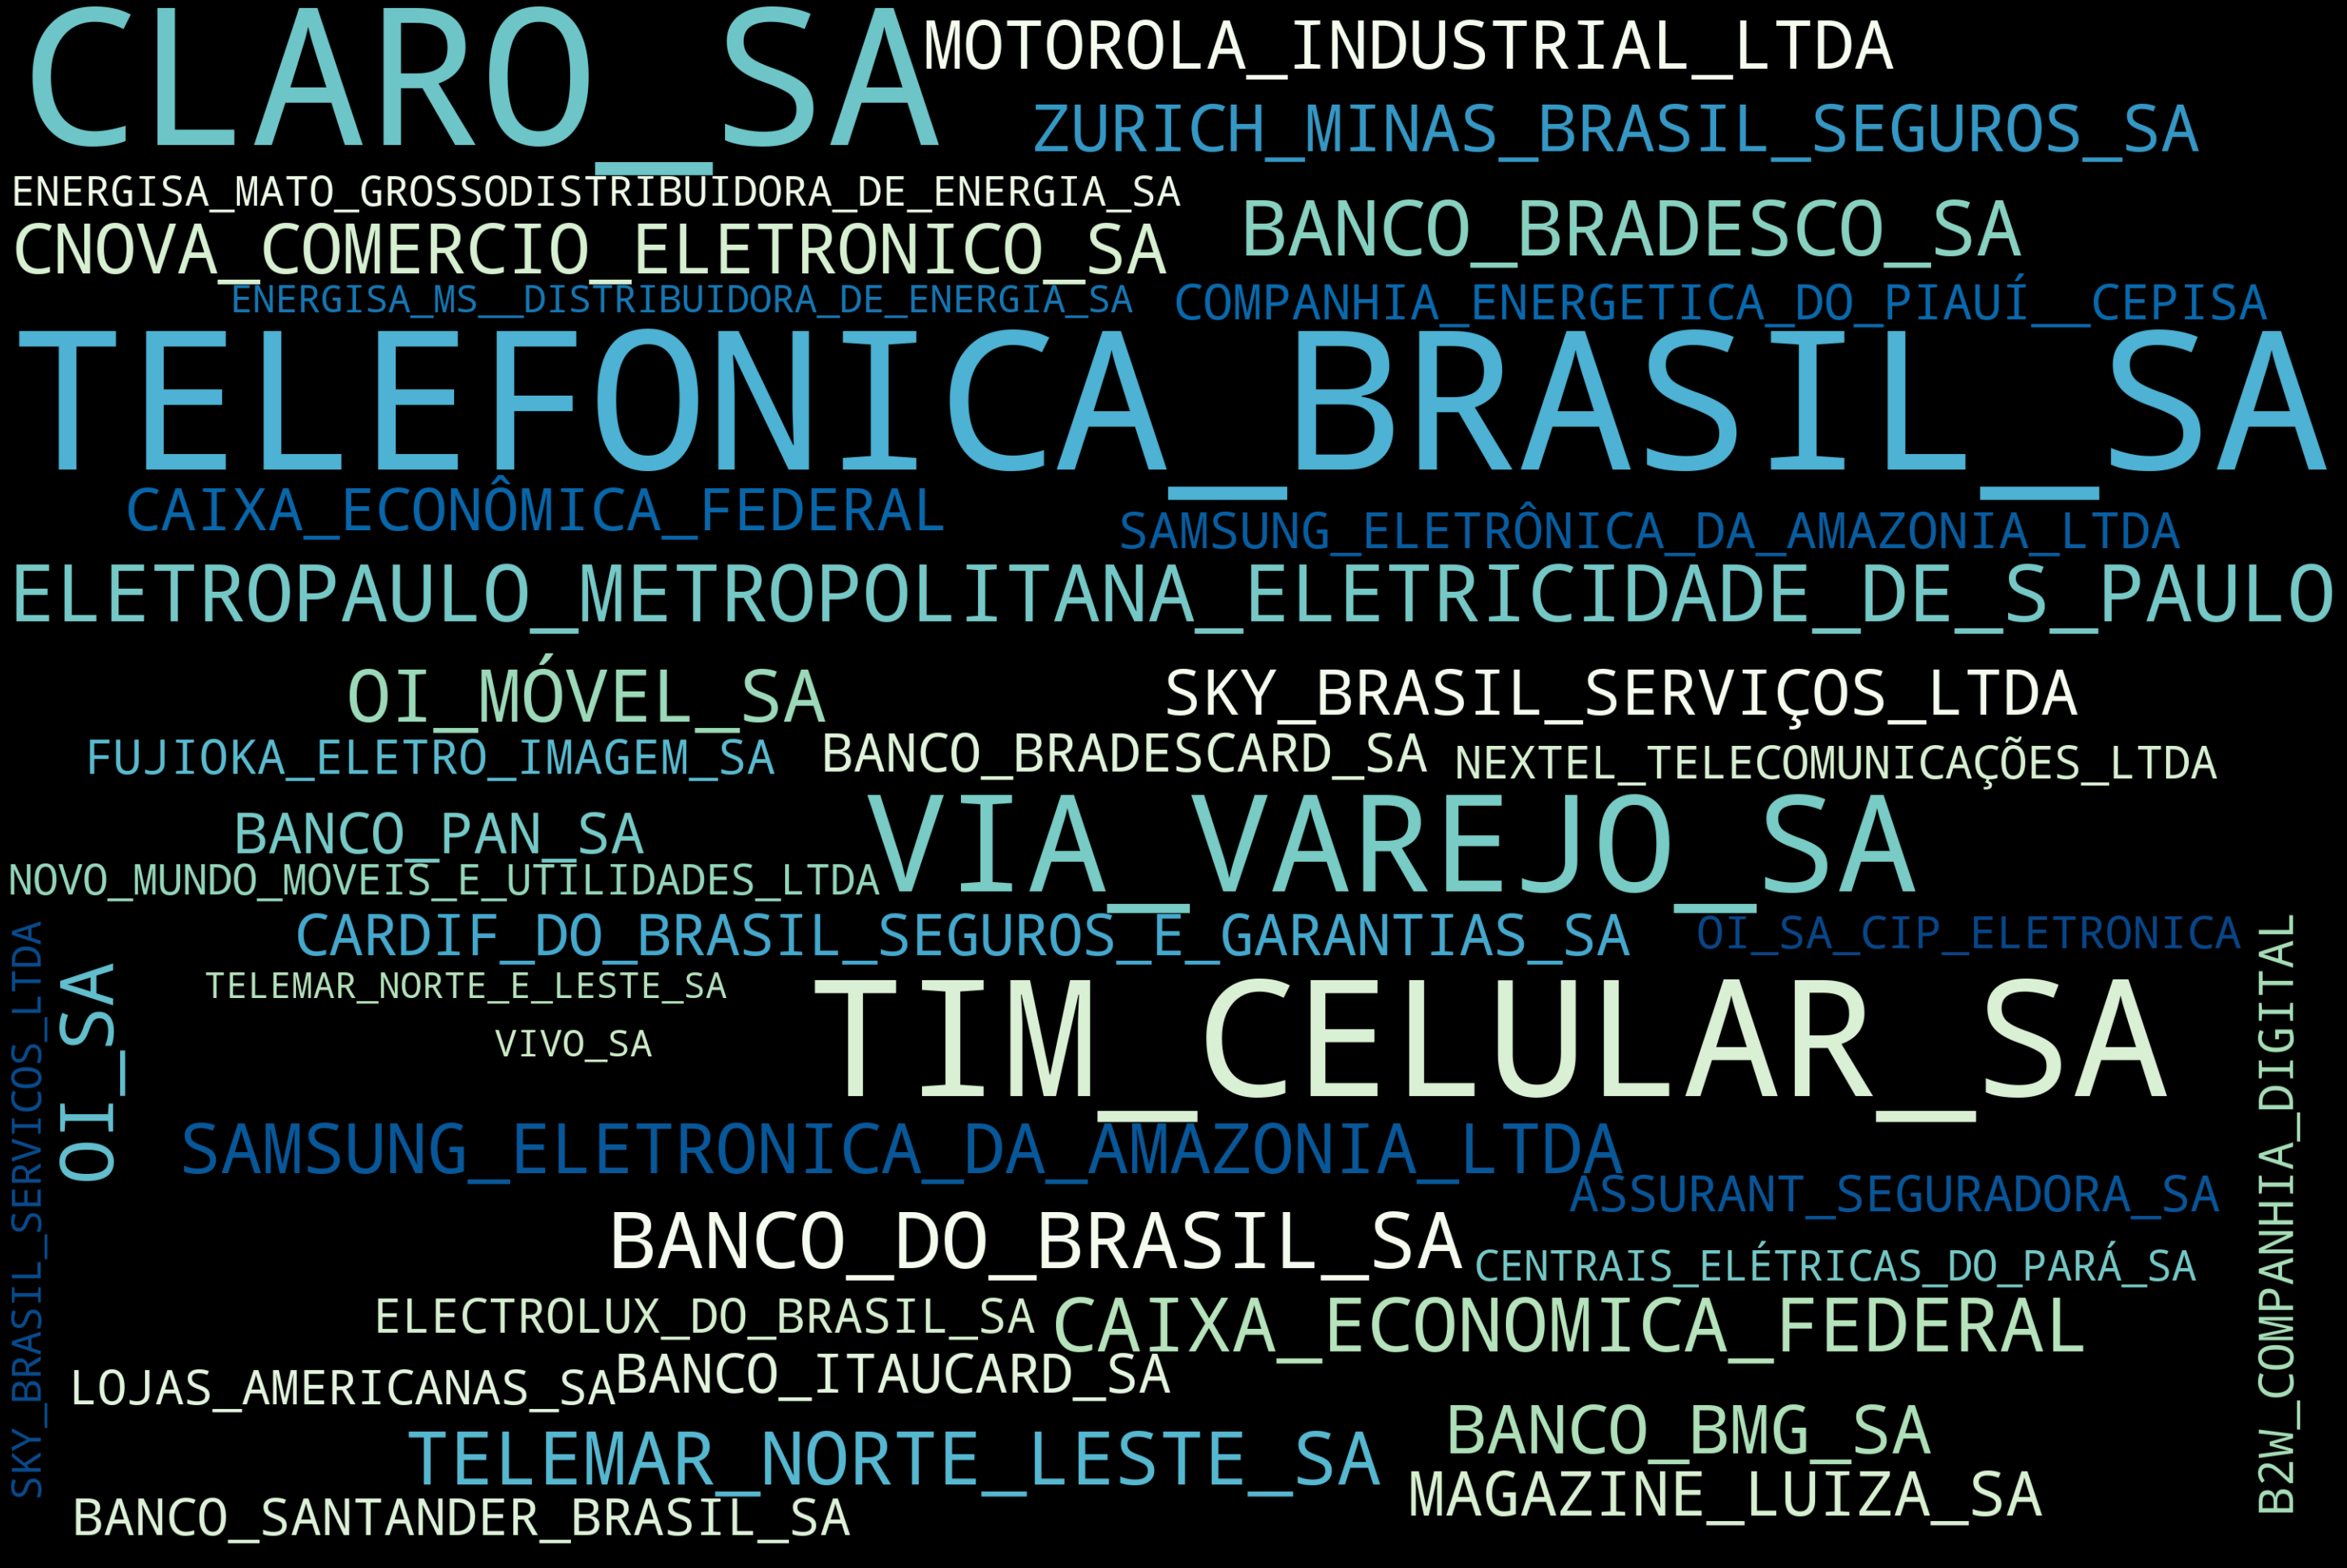

In [13]:
wordcloud_empresas = WordCloud(background_color='black', collocations=False, colormap='GnBu', width=3000, height=2000,max_font_size=1000, max_words=40).generate(s_empresas)
plt.figure(figsize=(40,30), facecolor='k', edgecolor='k')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('WordcloudEmpresas.png')
plt.show()

In [14]:
print(df_estado.groupby('estado').size().sort_values(ascending=False))

estado
SP    8127
GO    7764
MS    4723
RN    4073
MT    3972
MG    3460
PI    2153
RO    2057
SC    1955
CE    1766
ES     828
TO     567
PA     341
PB     302
MA     126
RS      90
PE       3
dtype: int64


In [15]:
s_estados = " ".join([text for text in df_estado['estado']])

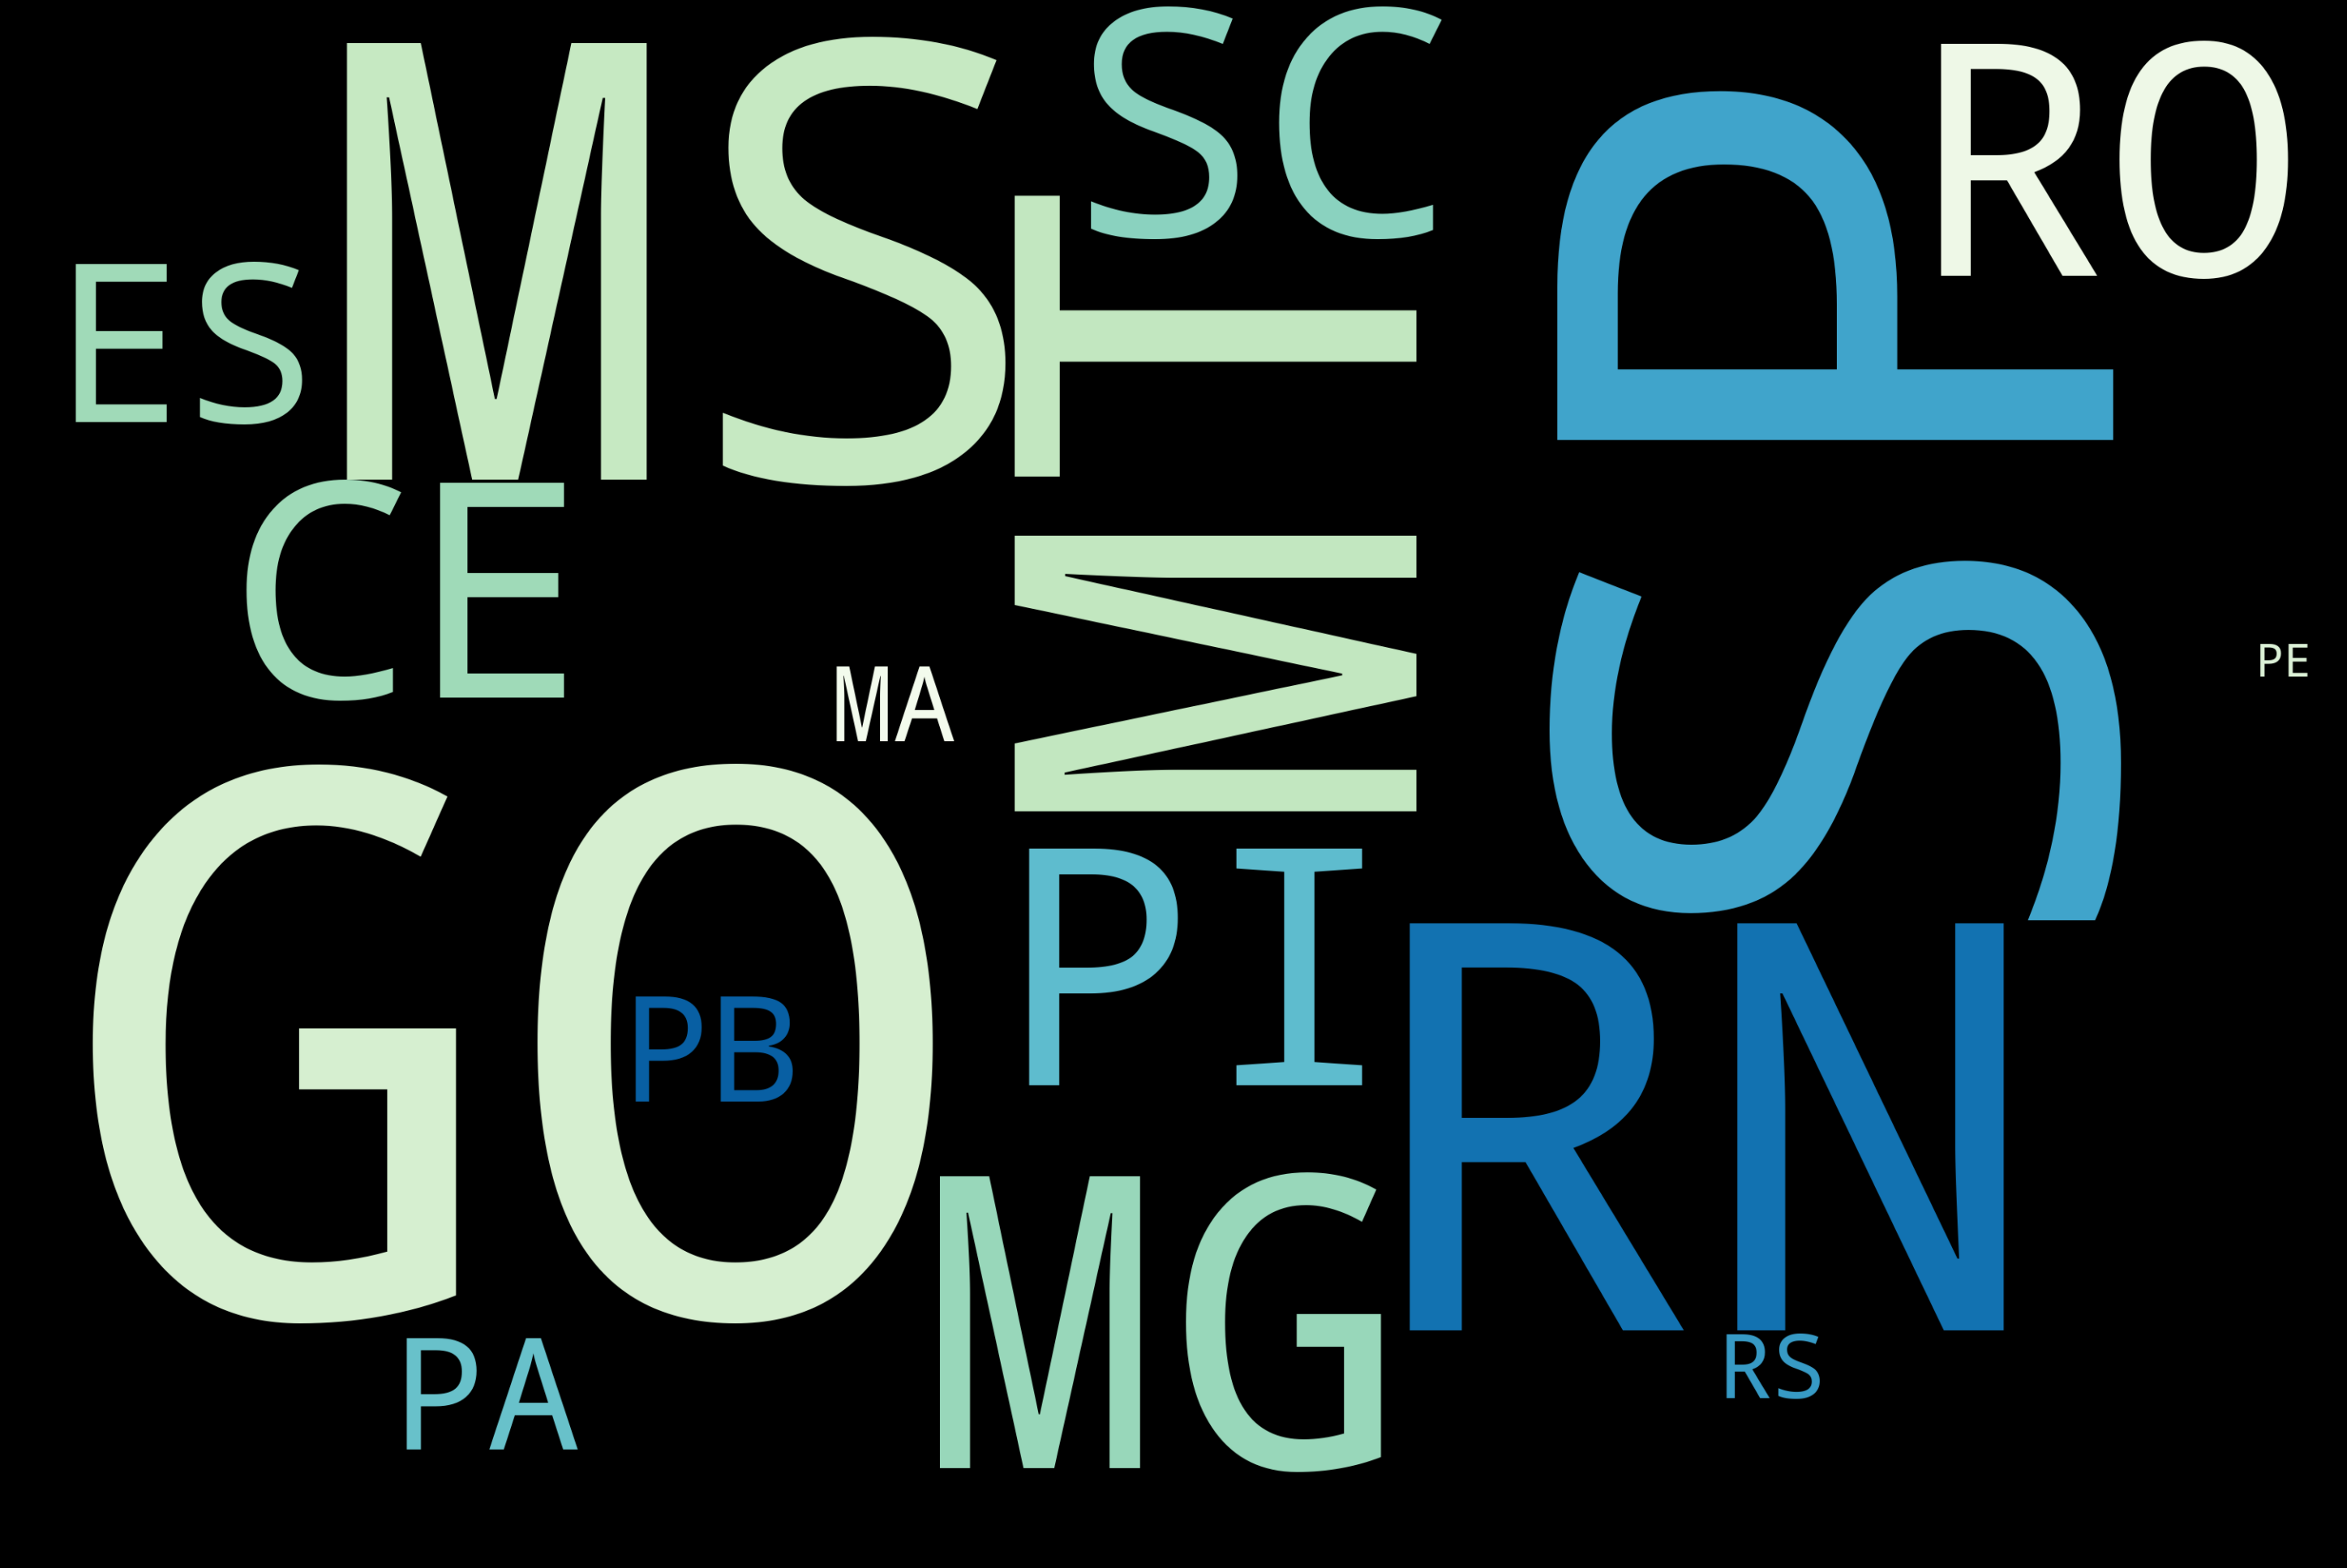

In [16]:
wordcloud_estados = WordCloud(background_color='black', collocations=False, colormap='GnBu', width=3000, height=2000,max_font_size=1000, max_words=17).generate(s_estados)
plt.figure(figsize=(40,30), facecolor='k', edgecolor='k')
plt.imshow(wordcloud_estados, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('WordcloudEstados.png')
plt.show()

In [17]:
df_problema['ProblemaSemEspaco'] = df_problema.replace({'problema': dicionario}, regex=True)

In [18]:
print(df_problema.groupby('problema').size().sort_values(ascending=False))

problema
Produto com vício                                                  6043
Cobrança indevida/abusiva                                          4695
Cobrança indevida.                                                 3272
Peso, volume e quantidade                                          1726
Garantia (Abrangência, cobertura, etc.)                            1438
                                                                   ... 
Revisional de aluguel                                                 1
Problemas com crédito consignado                                      1
Recusa no recebimento do aluguel/prestação                            1
Reajuste sem previsão contratual                                      1
Acidente de Consumo (causou danos pessoais, físicos, mal estar)       1
Length: 167, dtype: int64


In [19]:
s_problemas = " ".join([text for text in df_problema['ProblemaSemEspaco']])

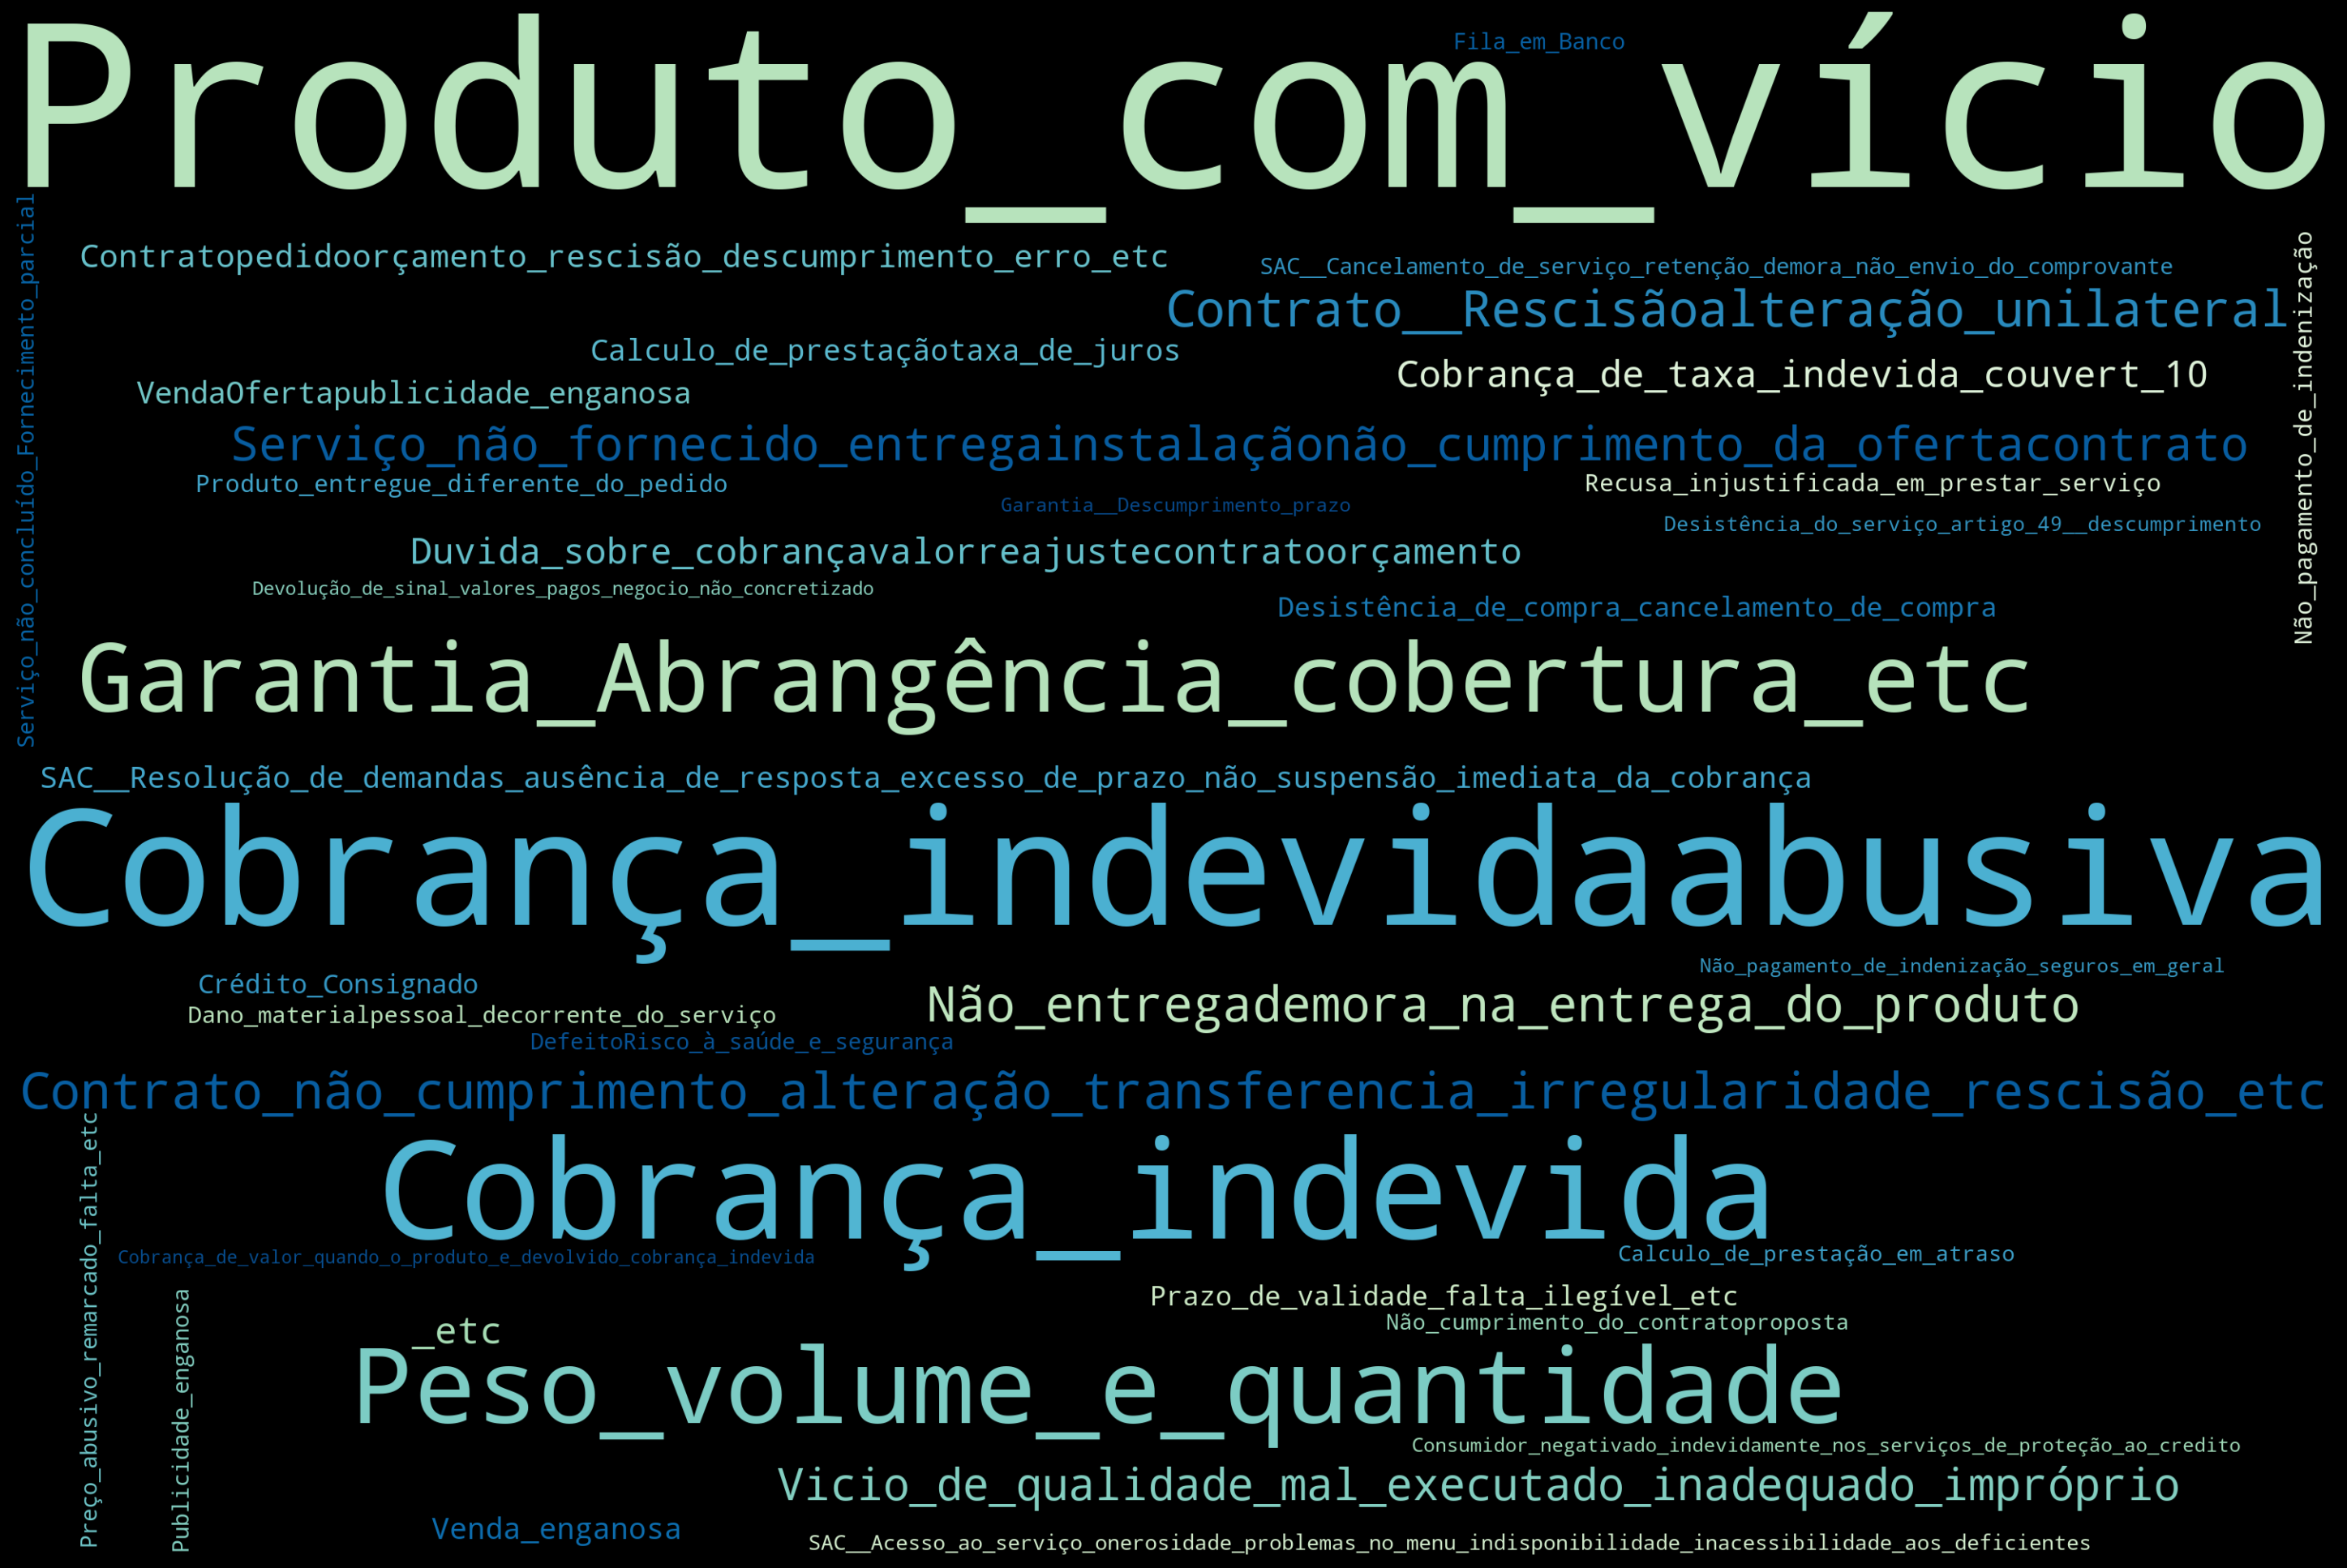

In [20]:
wordcloud_problemas = WordCloud(background_color='black', collocations=False, colormap='GnBu', width=3000, height=2000,max_font_size=1000, max_words=40).generate(s_problemas)
plt.figure(figsize=(40,30), facecolor='k', edgecolor='k')
plt.imshow(wordcloud_problemas, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('WordcloudProblemas.png')
plt.show()

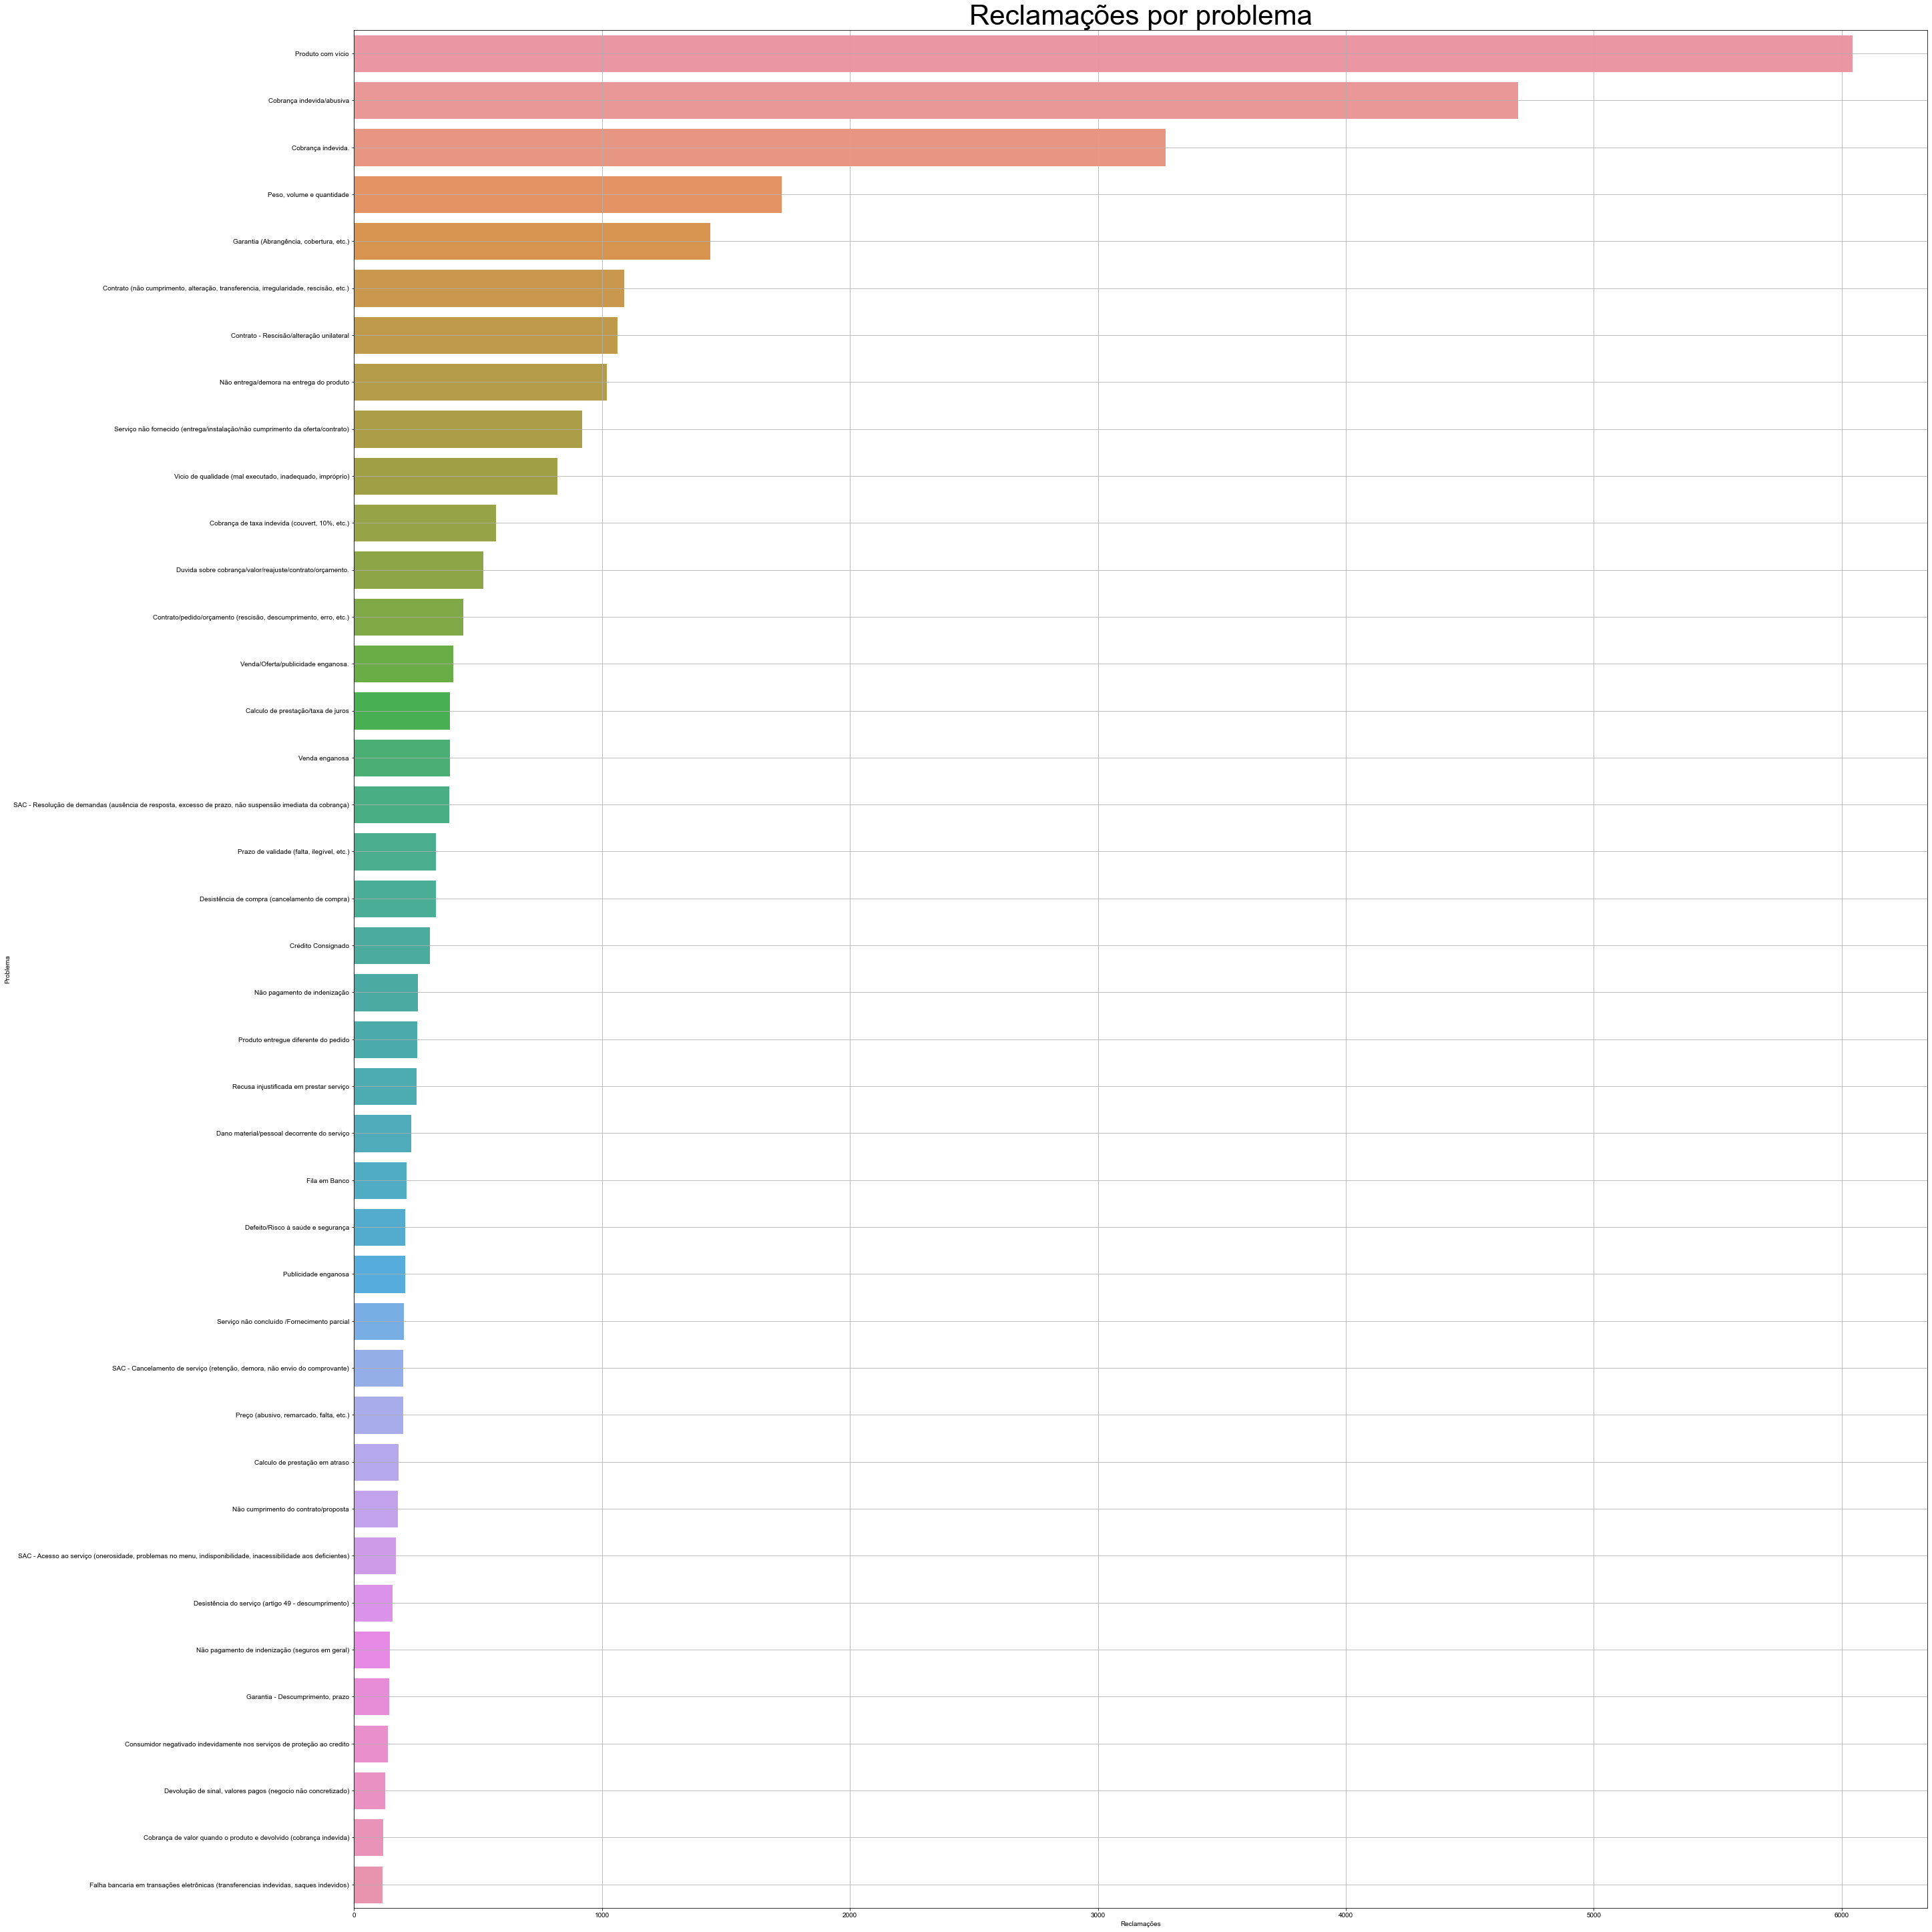

In [21]:
f, ax = plt.subplots(figsize=(40,40))
sns.set(style="ticks",font_scale=3.5)
sns.countplot(y = "problema", data=df_problema, order=df_problema["problema"].value_counts().index[:40])
ax.grid(True)
ax.set_title("Reclamações por problema")
ax.set_ylabel('Problema')
ax.set_xlabel('Reclamações')
plt.tight_layout(pad=0)
plt.savefig("ProblemaGrafBarraHor.png")
plt.show()